DATASET INFORMATION:



Air Quality Data Set 
Abstract: Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.

Data Set Characteristics:  

Multivariate, Time-Series

Number of Instances:

9358

Area:

Computer

Attribute Characteristics:

Real

Number of Attributes:

15

Date Donated

2016-03-23

Associated Tasks:

Regression

Missing Values?

Yes

Number of Web Hits:

160639


Source:

Saverio De Vito (saverio.devito '@' enea.it), ENEA - National Agency for New Technologies, Energy and Sustainable Economic Development


Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value. 
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded. 


Attribute Information:

0 Date	(DD/MM/YYYY) 
1 Time	(HH.MM.SS) 
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)	
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	
7 True hourly averaged NOx concentration in ppb (reference analyzer) 
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)	
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
12 Temperature in Â°C	
13 Relative Humidity (%) 
14 AH Absolute Humidity 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dfc = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",")

We first try to clean the data by visualising any NA/null values in the data set. 

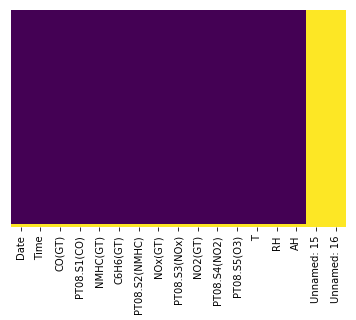

In [3]:
sns.heatmap(dfc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As from the above heatmap, we can see that the last two columns are completely empty and hence we can eliminate them.

In [4]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [5]:
dfc.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [6]:
dfc.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [7]:
dfc.Date.isnull().values.any()

True

In [8]:
dfc.dropna(axis=0, how= 'all', inplace=True)

In [9]:
dfc.dropna(axis=1, inplace=True)

Now the data is free of all the null values, but there are more unknown values which are -200 in value, as given in the description of the dataset.These -200 values in the data should be imputed with appropriate values (or be removed).

In [10]:
dfc.shape

(9357, 15)

As the dataset desciption states that the missing values are substituted by the value -200, we need to perform imputation to replace those values as these -200 values will mess up our statistical measures and graphs/correlation.

First ley us replace the dummy value of -200 by NaN throughout the dataset.

In [11]:
dfc.replace(to_replace= -200, value= np.NaN, inplace= True)

Now let us visualize the distribution of the null values using a heatmap.

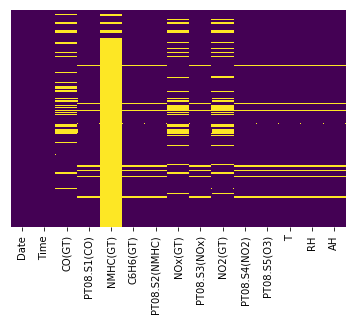

In [12]:
sns.heatmap(dfc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         914 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


manipulating the date and time columns to make them into a single column of DateTime object. Also, converting date to the datetime object and proper format.

In [14]:
dfc['DateTime'] = dfc['Date']+ ' ' + dfc['Time']

In [15]:
dfc.drop(['Time'], axis=1, inplace=True)

In [16]:
dfc['DateTime'] = pd.to_datetime(dfc['DateTime'].astype(str), format='%d/%m/%Y %H.%M.%S')

In [17]:
dfc['Date'] = pd.to_datetime(dfc['Date'].astype(str), format='%d/%m/%Y')

In [18]:
#dfc['Time'] = pd.to_datetime(dfc['Time'].astype(str), format='%H.%M.%S') 

In [19]:
dfc[['CO(GT)','C6H6(GT)','T','RH','AH']] = dfc[['CO(GT)','C6H6(GT)','T','RH','AH']].apply(pd.to_numeric)

In [20]:
import datetime

In [21]:
#Making a new column year, which may be useful to visualize yearly trends or year averages or measures.
dfc['Year'] = dfc['DateTime'].map(lambda x:x.year)

In [22]:
#Making a new column YearMonth, which may be useful to visualize monthly trends or year averages or measures.
dfc['YearMonth'] = pd.to_datetime(dfc.DateTime).dt.to_period('m')

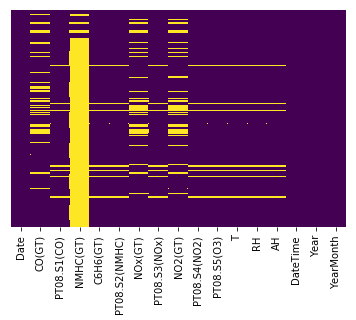

In [23]:
sns.heatmap(dfc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can see the NHMC(GT) column is missing many values, more than 85% values are NaN. Thus we can remove this column from the dataset as these values are very less likely to be of any significant importance in this dataset.

In [24]:
dfc.drop(['NMHC(GT)'], axis= 1, inplace= True)

Now let us get the value-counts of values in the columns to look at the number of NaN values present in each column.

We can try to replace these NaN values by taking the mean or the median of the whole column, but this won't be accurate and proper way to fill those values. 
Thus, filling the mean of that perticular day in which day the value is NaN makes more sense and would be proper way to impute the values. Hence, we groupby the date and take the mean and replace any NaN value by the mean of the values of that day.

In [25]:
dfc["T"] = dfc.groupby("Date")["T"].transform(lambda x: x.fillna(x.mean()))

In [26]:
dfc["CO(GT)"] = dfc.groupby("Date")["CO(GT)"].transform(lambda x: x.fillna(x.mean()))

In [27]:
dfc["NOx(GT)"] = dfc.groupby("Date")["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
dfc["NO2(GT)"] = dfc.groupby("Date")["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

Checking for the number of mean values again in each column.

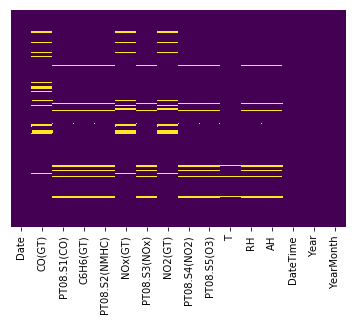

In [28]:
sns.heatmap(dfc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can see there are still some NaN values, this is because for these values, and for their corresponding date all the values for that date are NaN, hence the mean is also NaN. 
For this case, we fill these values using Forward Fill way inside the fillna function, using method 'ffill'.
We use forward fill here as even now taking the nean of the whole column(which has values for an entire year) does not make sense. Hence as these are hourly values, we can assume strong relationship between consecutive values for gas concentrations and humidity, and thus forward fill will be a very good method to fill thses values instead of dropping these records.

In [29]:
dfc.fillna(method='ffill', inplace= True)

In [30]:
dfc.isnull().any().any()

False

In [31]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 16 columns):
Date             9357 non-null datetime64[ns]
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
DateTime         9357 non-null datetime64[ns]
Year             9357 non-null int64
YearMonth        9357 non-null object
dtypes: datetime64[ns](2), float64(12), int64(1), object(1)
memory usage: 1.2+ MB


In [32]:
dfc.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.082589,1102.730362,10.190392,942.548253,239.419651,832.742225,109.382418,1453.014535,1030.511916,18.167474,48.817431,1.017382,2004.240141
std,1.383347,219.588101,7.565771,269.581368,200.833596,255.709423,46.058214,347.434084,410.916759,8.833685,17.354326,0.404829,0.427192
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004.000000
25%,1.100000,938.000000,4.400000,733.000000,102.000000,655.000000,76.000000,1228.000000,726.000000,11.500000,35.400000,0.726200,2004.000000
50%,1.700000,1062.000000,8.300000,911.000000,177.000000,807.000000,103.608696,1460.000000,964.000000,17.600000,48.900000,0.987500,2004.000000
75%,2.700000,1237.000000,14.000000,1117.000000,316.000000,968.000000,135.000000,1677.000000,1287.000000,24.300000,61.900000,1.306700,2004.000000
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005.000000


The describe method is used to find the summar statistics for every column. We get mean of values, standard devistion, minimum value,maximum value and 25%, 50% and 75% quartiles.

In [33]:
#sns.pairplot(dfc, hue='Year')

The pairplot above helps us analyse the relationships of variables with each other.As we can see except the temperature, Relative and Absolute humidity attributes, almost all of the other attributes show significant (though not exact) linear dependency with each other.

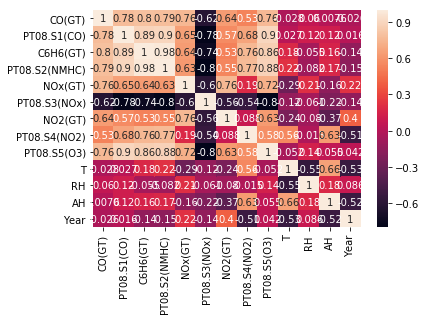

In [34]:
sns.heatmap(dfc.corr(), annot=True)

In [35]:
#correlation values table
print(dfc.corr())

                 CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.781841  0.803253       0.788371  0.758892   
PT08.S1(CO)    0.781841     1.000000  0.886325       0.896015  0.651010   
C6H6(GT)       0.803253     0.886325  1.000000       0.982485  0.641097   
PT08.S2(NMHC)  0.788371     0.896015  0.982485       1.000000  0.625352   
NOx(GT)        0.758892     0.651010  0.641097       0.625352  1.000000   
PT08.S3(NOx)  -0.616421    -0.777913 -0.737702      -0.798121 -0.598576   
NO2(GT)        0.641499     0.569623  0.525939       0.548668  0.756066   
PT08.S4(NO2)   0.529622     0.676413  0.756328       0.769786  0.186632   
PT08.S5(O3)    0.761814     0.901460  0.861688       0.876588  0.722046   
T             -0.028404     0.027467  0.180001       0.221644 -0.287481   
RH             0.059654     0.120042 -0.054949      -0.082087  0.209849   
AH             0.007591     0.121724  0.155825       0.174921 -0.156331   
Year          -0.025597  

In [36]:
dfc

,Date,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Year,YearMonth
0,2004-03-10,2.600000,1360.0,11.9,1046.0,166.000000,1056.0,113.000000,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,2004,2004-03
1,2004-03-10,2.000000,1292.0,9.4,955.0,103.000000,1174.0,92.000000,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,2004,2004-03
2,2004-03-10,2.200000,1402.0,9.0,939.0,131.000000,1140.0,114.000000,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,2004,2004-03
3,2004-03-10,2.200000,1376.0,9.2,948.0,172.000000,1092.0,122.000000,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,2004,2004-03
4,2004-03-10,1.600000,1272.0,6.5,836.0,131.000000,1205.0,116.000000,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,2004,2004-03
5,2004-03-10,1.200000,1197.0,4.7,750.0,89.000000,1337.0,96.000000,1393.0,949.0,11.2,59.2,0.7848,2004-03-10 23:00:00,2004,2004-03
6,2004-03-11,1.200000,1185.0,3.6,690.0,62.000000,1462.0,77.000000,1333.0,733.0,11.3,56.8,0.7603,2004-03-11 00:00:00,2004,2004-03
7,2004-03-11,1.000000,1136.0,3.3,672.0,62.000000,1453.0,76.000000,1333.0,730.0,10.7,60.0,0.7702,2004-03-11 01:00:00,2004,2004-03
8,2004-03-11,0.900000,1094.0,2.3,609.0,45.000000,1579.0,60.000000,1276.0,620.0,10.7,59.7,0.7648,2004-03-11 02:00:00,2004,2004-03
9,2004-03-11,0.600000,1010.0,1.7,561.0,144.391304,1705.0,99.869565,1235.0,501.0,10.3,60.2,0.7517,2004-03-11 03:00:00,2004,2004-03


As from the correlation heatmap or the values in the correlation matrix, we can see that there is a very significant correlation between the gases among themselves. Also NOx(GT) and NO2(GT) are also highly correlated as expected, because the NO2(GT) is a subset value of the NOx(GT) values.
The temperature(T), RH and AH values show somewhat significant correlation around 0.60 amongst themselves, but are very weakly correlated with the gas concentration attributes.Hence in a model approximating the gas concentrations, T, RH or AH values might not contribute well in the model estimation.
The value of correlation in the correlation matrix above 0.6-0.7 is generally considered a decent correlation. The correlations grater than 0.8 are good, and the ones with values grater than 0.9 are very well corelated.

Linear Regression

Question:
   * Find a significant linear relation of your choosing in your data. Create a multivariate linear model. (50 points)
Answer the following questions for the multivariate linear model:
* Is the relationship significant?   
* Are any model assumptions violated?   
* Is there any multi-colinearity in the model?   
* In the multiple regression models are predictor variables independent of all the other predictor variables?   
* In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.   
* Does the model make sense?  
* Cross-validate the model. How well did it do?      
* Does regularization help with creating models that validate better on out of sample data?   

We will try to predict the column values of C6H6 using other columns, As it has significant linear relationships with other gas concentrations. Also from the p-values of each relationship, we can infer that for p-value <0.05, we can reject the null hypothesis and the there is strong significant relationship between the attributes. As from the correlation matrix we can see that the columns T, AH, RH, Year and PT08.S3(NOx). 

- In the multiple regression model, predictor variables are not independent of all the other predictor variables.  
Variable to predict: 'C6H6(GT)'
Also,ranking the most significant predictor variables:
1.'PT08.S2(NMHC)'
2.'PT08.S1(CO)'
3.'PT08.S5(O3)'
4.'CO(GT)'
5.'PT08.S4(NO2)'
6.'NOx(GT)'
7.'NO2(GT)'

Neglected columns due to poor correlation:
'Date', 'Time', 'NMHC(GT)','PT08.S3(NOx)' 'T', 'RH', 'AH',


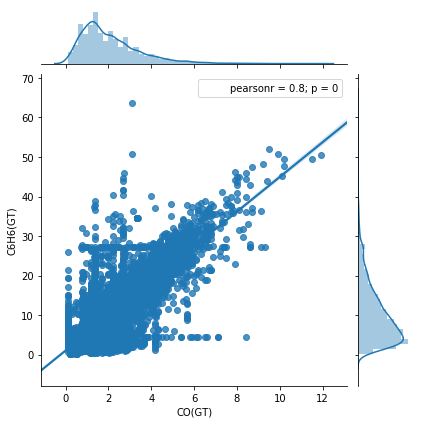

In [37]:
sns.jointplot(x="CO(GT)", y="C6H6(GT)", data=dfc, kind="reg")

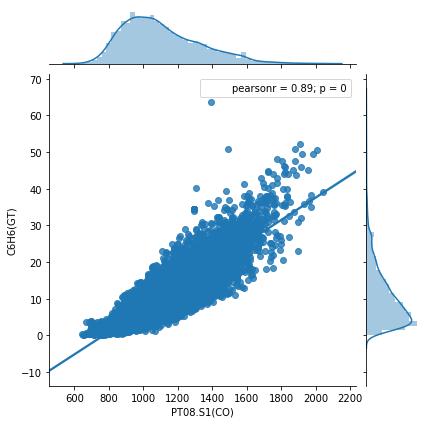

In [38]:
sns.jointplot(x="PT08.S1(CO)", y="C6H6(GT)", data=dfc, kind="reg")

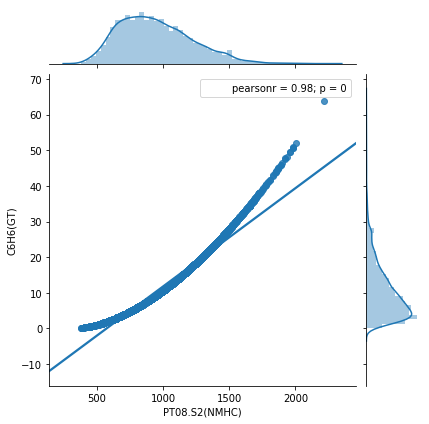

In [39]:
sns.jointplot(x="PT08.S2(NMHC)", y="C6H6(GT)", data=dfc, kind="reg")

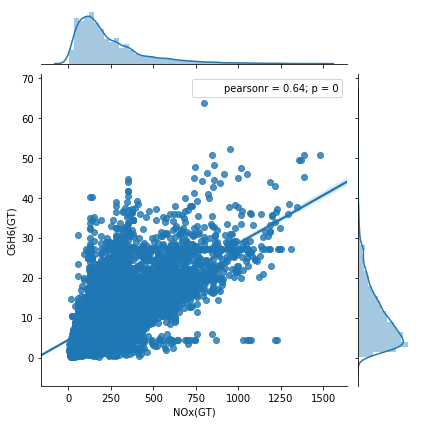

In [40]:
sns.jointplot(x="NOx(GT)", y="C6H6(GT)", data=dfc, kind="reg")

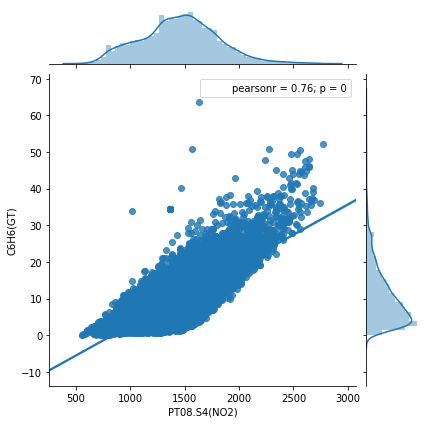

In [41]:
sns.jointplot(x="PT08.S4(NO2)", y="C6H6(GT)", data=dfc, kind="reg")

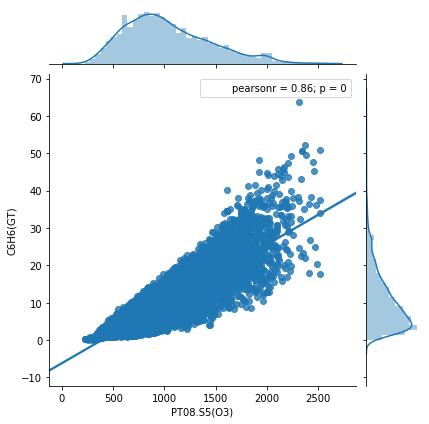

In [42]:
sns.jointplot(x="PT08.S5(O3)", y="C6H6(GT)", data=dfc, kind="reg")

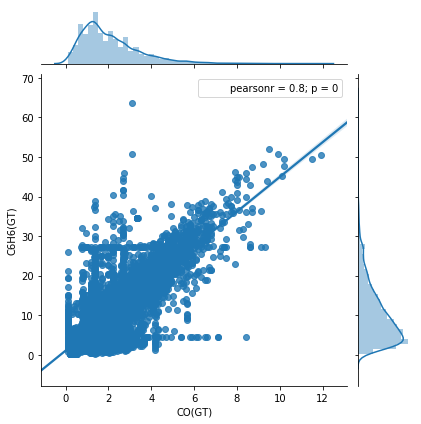

In [43]:
sns.jointplot(x="CO(GT)", y="C6H6(GT)", data=dfc, kind="reg")

All of the p-values are zero, and also there is strong correlation between C6H6 with others from plot and from correlation matrix.relationship significant.

In [44]:
dfclm= dfc[:]

In [45]:
target_dfclm = pd.DataFrame(dfclm['C6H6(GT)'])

In [46]:
dfclm.drop(['PT08.S3(NOx)','T', 'RH', 'AH','Year','C6H6(GT)', 'DateTime','YearMonth','Date'], axis= 1, inplace= True)

/Users/shrikumarpatil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(dfclm, target_dfclm, test_size=0.4, random_state=101)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm= LinearRegression()

In [51]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print(lm.intercept_)

[-14.52692972]


In [53]:
lm.coef_

array([[  3.91595154e-01,   7.57512232e-04,   2.67145617e-02,
          2.55362471e-03,  -1.36036059e-02,  -3.49437120e-04,
         -7.01154250e-04]])

In [54]:
predictions = lm.predict(X_test)

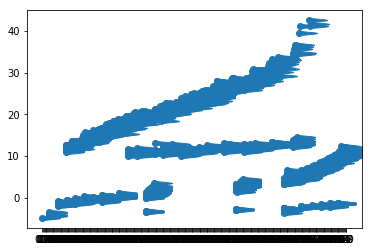

In [55]:
plt.scatter(y_test,predictions)

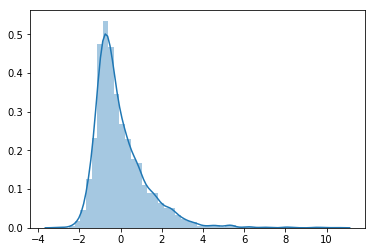

In [56]:
sns.distplot((y_test-predictions),bins=50);

The residuals when plotted are normally distributed, hence this assumption of the linear model is not violated.

In [57]:
from sklearn import metrics

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared value', metrics.r2_score(y_test, predictions))

MAE: 0.943497171691
MSE: 1.67321774894
RMSE: 1.29352918364
R-squared value 0.971145305046


Cross- Validation : K-fold Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

lm_cv = LinearRegression()

# Compute 10-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lm_cv, dfclm, target_dfclm, cv=10)

In [60]:
# Print the 10-fold cross-validation scores
print(cv_scores)

[ 0.97152146  0.97060259  0.97492173  0.97204874  0.97008359  0.96343476
  0.96310752  0.97151211  0.94744931  0.96470352]


Cv scores are nothing but R-squared values for each training fold that we train. Hence, we can check if the Cross-validated model did well or not by comparing this average R-squared value with the earlier one without cross-validation.

As we can see from the cross validations scores, 5 out of the 10 folds actually perform well than the earlier linear model. Hence cross- validation does perform better for some folds but the average is almost similar to the earlier model.

In [61]:
print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 10-Fold CV Score: 0.9669385339318863


Assumption: Autocorrelation 
This means relation between error terms, which often happens in time series data. But as the accuracy of the model is very good, this assumption is very unlikely to be true. We can also check it using Durbin-Watson statistic from the stats model packages's ordinary least squares model.

Assumption: Multicollinearity
To check for multicollinearity, we can look at the correlation matrix or heatmap again to see relationships between predictor variables. Here, we have significant collinearity between the variables as they all are well correlated with each other according to the correlation matrix.Also, we can do a VIF test: Variance inflation factor. value of VIF grater than 10 suggests serious multicollinearity.
Hence, this assuption is violated.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfclm.values, i) for i in range(dfclm.shape[1])]
vif["features"] = dfclm.columns
print(vif)

   VIF Factor       features
0   11.286111         CO(GT)
1  101.291708    PT08.S1(CO)
2  137.494327  PT08.S2(NMHC)
3   10.305131        NOx(GT)
4   17.388783        NO2(GT)
5   83.571384   PT08.S4(NO2)
6   43.460911    PT08.S5(O3)


As all the VIF values are grater than 10, the assumption of multicollinearity is also violated.

Assumption: homoskedasticity
error terms must have constant variance. We can check this using residual vs fitted values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern.

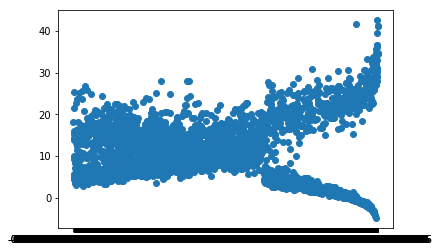

In [63]:
plt.scatter((y_test-predictions),predictions)

The above graph is funnel shaped, and hence the assumption of homoskedasticity is also violated.

Regularisation

Ridge

In [64]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

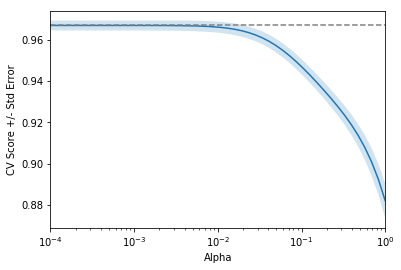

In [65]:
from sklearn.linear_model import Ridge

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []
ridge = Ridge(normalize= True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, dfclm,target_dfclm, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [66]:
ridge = Ridge(alpha= 0.01, normalize= True)
ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)

print('R-squared value', metrics.r2_score(y_test, ridge_pred))

R-squared value 0.970654384188


Lasso

[ 0.  0.  0.  0.  0.  0.  0.]


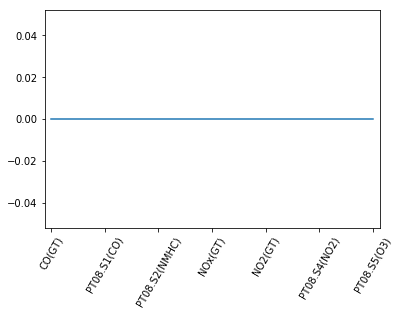

In [67]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.4, normalize= True)


lasso.fit(X_train,y_train)


lasso_coef = lasso.coef_
print(lasso_coef)


plt.plot(range(len(dfclm.columns)), lasso_coef)
plt.xticks(range(len(dfclm.columns)), dfclm.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [68]:
lasso_pred = lasso.predict(X_test)

Lasso graph above helps us identify the important characteristics which should be kept and penalizes the coefficient of the less significant predictors to zero, and hence it helps us to select only the significant predictors. Here, however we get a straight line graph because all of the present variables are significantly correlated with C6H6.

In [69]:
print('R-squared value', metrics.r2_score(y_test, lasso_pred))

R-squared value -0.000430354957182


The prediction score after ridge regularization is only slighlty better by 0.2. Hence, simple linear model will almost perform identical to ridge regularised model for out of the sample data.

Logistic Regression
Question:
* Generate a logistic model for your data:
    * Find a significant logistic linear model of your choosing in your data. Create a logistic linear model. (25 points)
Answer the following questions for the logistic linear model:
* Is the relationship significant?  
* Are any model assumptions violated?   
* Cross-validate the model. How well did it do? 


Logistic regression is used for classification and it will predict the probability of belonging to a particular class.
So the target column in this case will have to be limited discrete values or binary. So, for logistic regression, we will divide the column C6H6 into 3 categoricals according to a specific range, and make this new column the target for the logistic regression.

In [70]:
dfclog = dfc[:]

In [71]:
dfclog.drop(['PT08.S3(NOx)','T', 'RH', 'AH','Year','DateTime','YearMonth','Date'], axis= 1, inplace= True)

/Users/shrikumarpatil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
dfclog['C6H6_conc'] = np.where(dfclog['C6H6(GT)']>=10, 'high', 'notHigh')

/Users/shrikumarpatil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
target_dfclog = pd.DataFrame(dfclog['C6H6_conc'])

In [74]:
dfclog.drop(['C6H6(GT)','C6H6_conc'], axis= 1, inplace= True)

/Users/shrikumarpatil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
X_train, X_test, y_train, y_test = train_test_split(dfclog, target_dfclog, test_size=0.33, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/shrikumarpatil/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
predictions_log = logmodel.predict(X_test)

In [79]:
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict

In [80]:
print(classification_report(y_test,predictions_log))

             precision    recall  f1-score   support

       high       0.98      0.98      0.98      1279
    notHigh       0.99      0.98      0.98      1809

avg / total       0.98      0.98      0.98      3088



In [81]:
print(metrics.accuracy_score(y_test, predictions_log))

0.982189119171


In [82]:
predictions_logcv = model_selection.cross_val_predict(logmodel, dfclog, target_dfclog, cv=10)

/Users/shrikumarpatil/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shrikumarpatil/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shrikumarpatil/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shrikumarpatil/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d

In [83]:
print(metrics.accuracy_score(target_dfclog, predictions_logcv))

0.972213316234


* Is the relationship significant?  Yes, we get 98% accuracy.
* Are any model assumptions violated?   Yes.Similar to those of the linear model as logistic regression is also a general linear model classifier.
* Cross-validate the model. How well did it do? the difference between the accuracy scores is 0.8.

Clustering of Data
Question:
* Cluster your data:
    * Use at least two methods to cluster your data. (25 points)
Answer the following questions for the clustering:
* Do the clustering methods generate the same clusters?
* Does scaling effect the clustering?  
* Does the clustering produce interesting groupings?  

Method 1: DBSCAN density based

In [84]:
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN

In [85]:
dfcdbscan = dfc[:]

In [86]:
dfcdbscan.drop(['Year','DateTime','YearMonth','Date'], axis= 1, inplace= True)

/Users/shrikumarpatil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
dbsmod = DBSCAN(eps=0.5, min_samples=10)
dbsmod.fit(dfcdbscan)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

In [88]:
dbsmod_scaled = DBSCAN(eps=0.5, min_samples=10)

In [89]:
dbsmod_scaled.fit(scale(dfcdbscan))

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

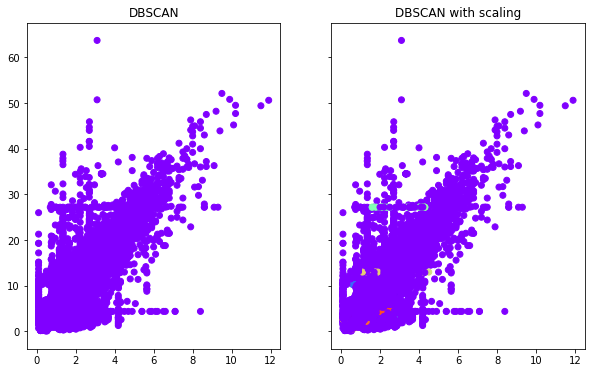

In [90]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('DBSCAN')
ax1.scatter(dfcdbscan['CO(GT)'],dfcdbscan['C6H6(GT)'],c=dbsmod.labels_,cmap='rainbow')
ax2.set_title("DBSCAN with scaling")
ax2.scatter(dfcdbscan['CO(GT)'],dfcdbscan['C6H6(GT)'],c=dbsmod_scaled.labels_,cmap='rainbow')

As we can see from the plots, for both scaled and without scaled, we do not get any significantly interpretable clusters, this is because DBSCAN is density based algorithm , and the data points here are all segmented very near to each other and are densely associated with very fine boundaries and not enough distance.

Method 2: K-Means clustering

In [91]:
dfckmeans = dfc[:]

In [92]:
dfckmeans.drop(['Year','DateTime','YearMonth','Date'], axis= 1, inplace= True)

/Users/shrikumarpatil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
from sklearn.cluster import KMeans

In [94]:
kmmodel = KMeans(n_clusters=8)

In [95]:
kmmodel.fit(dfckmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [96]:
kmmodel.cluster_centers_

array([[  3.46692445e+00,   1.34250459e+03,   1.62887287e+01,
          1.18274836e+03,   5.60249810e+02,   5.61583224e+02,
          1.71601200e+02,   1.44314417e+03,   1.61527130e+03,
          1.21988070e+01,   5.60710354e+01,   8.00442071e-01],
       [  1.91552831e+00,   1.11199545e+03,   1.06905508e+01,
          9.98229914e+02,   1.55515107e+02,   7.88688226e+02,
          9.80641778e+01,   1.64098636e+03,   1.01185093e+03,
          2.44327505e+01,   4.29923194e+01,   1.23443719e+00],
       [  1.25610492e+00,   9.23864791e+02,   3.64446461e+00,
          6.83812160e+02,   1.96512092e+02,   9.53588022e+02,
          1.12599482e+02,   9.54892922e+02,   7.00147005e+02,
          9.24806865e+00,   4.86067151e+01,   5.81285209e-01],
       [  5.12385576e+00,   1.58555866e+03,   2.91700186e+01,
          1.52568156e+03,   6.49207426e+02,   4.65445065e+02,
          1.62200451e+02,   2.02309311e+03,   1.89135754e+03,
          1.70128025e+01,   5.47201117e+01,   1.12640056e+00],
    

In [97]:
kmmodel_scaled = KMeans(n_clusters=8)

#scaling the data
kmmodel_scaled = kmmodel_scaled.fit(scale(dfckmeans))


print(kmmodel_scaled.labels_)

[4 4 4 ..., 2 2 2]


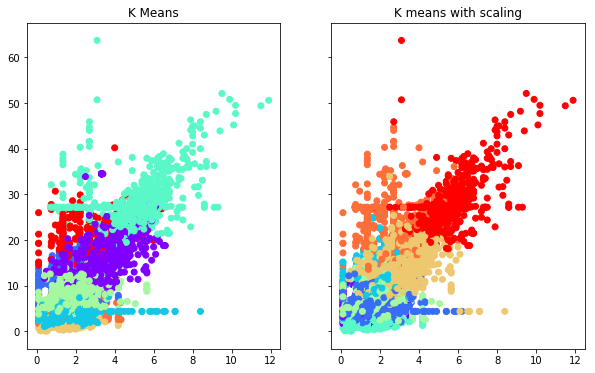

In [98]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(dfckmeans['CO(GT)'],dfckmeans['C6H6(GT)'],c=kmmodel.labels_,cmap='rainbow')
ax2.set_title("K means with scaling")
ax2.scatter(dfckmeans['CO(GT)'],dfckmeans['C6H6(GT)'],c=kmmodel_scaled.labels_,cmap='rainbow')

The k-means algorithm produces better clusters, but these models are also significantly change after scaling. The reason being the use distance metrics to form clusters.